## 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'C:\Users\alber\Instacart Basket Analysis'

In [2]:
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_customer_merge.pkl'))

In [3]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

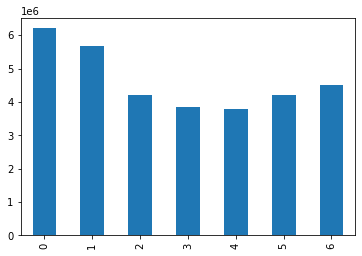

In [52]:
# Bar chart showcasing orders per day in descending order
Week_bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [5]:
# Creating histogram to show frequency of prices
# Mark the 5,127 outlier price values as missing as instructed in exercise since they don’t make sense in terms of the other values in the column. 
df.loc[df['prices'] >100, 'prices'] = np.nan

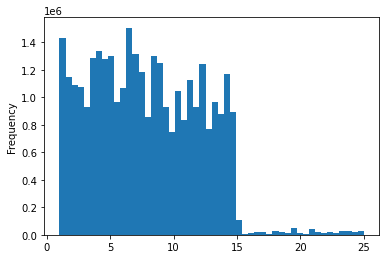

In [6]:
hist = df['prices'].plot.hist(bins=50)

In [7]:
# create bar chart grouping low_range_items, medium_range_items, and high_range_items
df.loc[df['prices']<5, 'price_range'] = 'low range product'
df.loc[(df['prices']>=5) & (df['prices']<15), 'price_range'] = 'mid range product'
df.loc[df['prices']>=15, 'price_range'] = 'high range product'

<>:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
C:\Users\alber\AppData\Local\Temp\ipykernel_19200\1232208876.py:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  'price_range'(xrange(10), rotation='vertical')
C:\Users\alber\AppData\Local\Temp\ipykernel_19200\1232208876.py:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  'price_range'(xrange(10), rotation='vertical')
C:\Users\alber\AppData\Local\Temp\ipykernel_19200\1232208876.py:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  'price_range'(xrange(10), rotation='vertical')


NameError: name 'xrange' is not defined

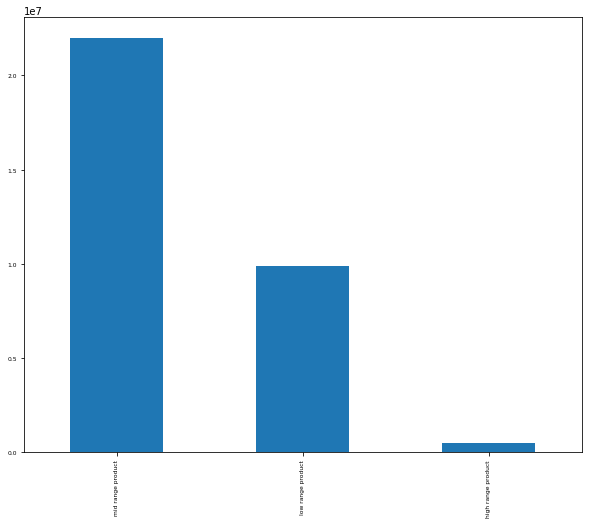

In [66]:
bar2 = df['price_range'].value_counts().plot.bar(fontsize = 6, figsize = [10,8])

<AxesSubplot:xlabel='prices', ylabel='prices'>

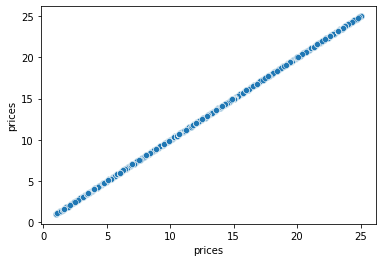

In [9]:
# Creating a scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [10]:
# Creating random sample for line graph

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [13]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

In [14]:
# Checking expected results

len(df)

32404859

In [15]:
len(big) + len(small)

32404859

In [16]:
df_2 = small[['orders_day_of_week','prices']]

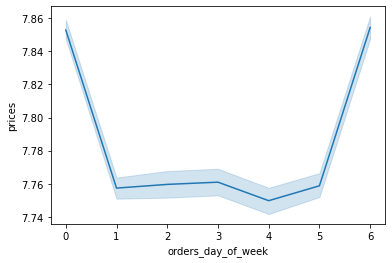

In [17]:
line = sns.lineplot(data = df_2, x='orders_day_of_week',y='prices')

## 3. Providing descriptive findings about sales to senior stakeholders. 

In [18]:
df['order_hour_of_day']

0            8
1            7
2           12
3            7
4           15
            ..
32404854    23
32404855    11
32404856    11
32404857    15
32404858    12
Name: order_hour_of_day, Length: 32404859, dtype: int64

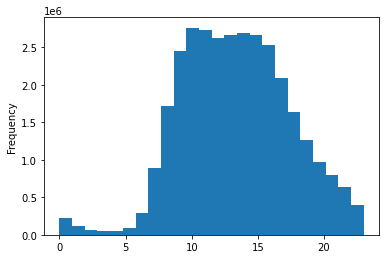

In [19]:
hist2 = df['order_hour_of_day'].plot.hist(bins=24)

# Histogram representing the total amount of orders for each hour in the day.
# Used 24 bins to represent the 24 hours in the day.

In [20]:
# Checking histogram accuracy
df['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

#### The histogram represents the hours in a day (0-23) with the total amount of orders placed for each hour (in millions). The fewest amount of orders are from 12am until 6am with the most being from 9am until 4pm.

## 4. Distribution of orders in terms of customer loyalty. 

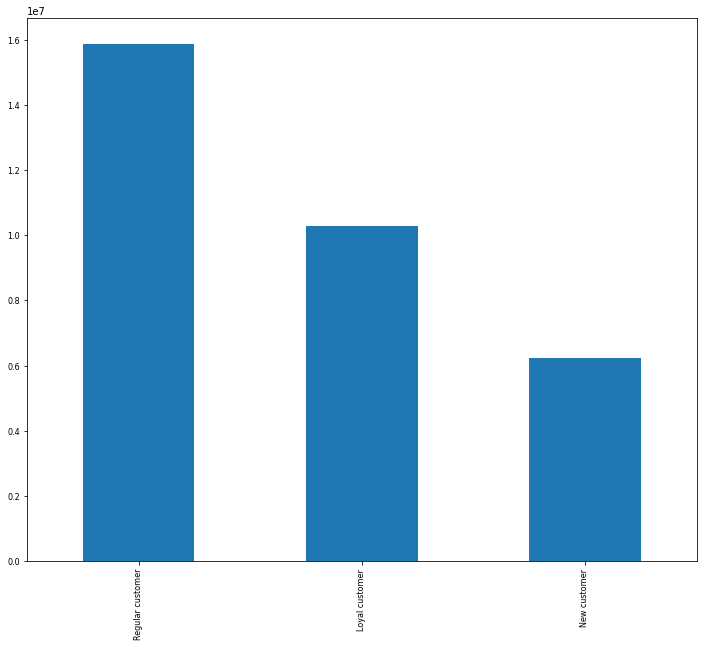

In [49]:
bar = df['loyalty_flag'].value_counts().plot.bar(fontsize = 8, figsize=[12,10])

#### Almost 16,000,000 of our consumers are regular customers, with around 10,000,000 being loyal customers, and about 6,000,000 being new customers.

In [24]:
# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
# Create a df with just the columns needed
df_small_2 = small[['order_hour_of_day','prices']]

In [25]:
# check df 
df_small_2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!) 

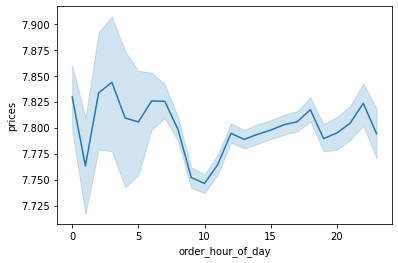

In [28]:
# Using the earlier splitted data of 30% and selecting the right columns
df_prices_hour = small[['order_hour_of_day', 'prices']]
line2 = sns.lineplot(data=df_prices_hour,x='order_hour_of_day',y='prices')

It looks like customers are actually spending more in the morning even though the frequency of orders was shown to be low. Customers are making more orders in the afternoon but they are spending less. The highest expenditure is happening between 12am- 7am, with the lowest expenditure between 10-11 am. Lowest prices seem to be around 12am with highest prices being around 3am. 

## 6. Determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows

In [29]:
df_age_family = small[['number_of_dependents','age']]

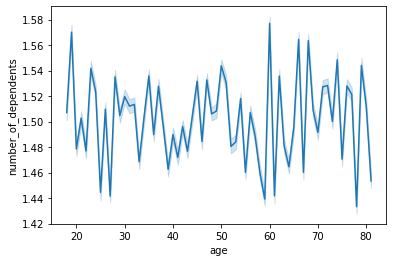

In [30]:
line3 = sns.lineplot(data=df_age_family,x='age',y='number_of_dependents')

#### The line graph above does not show a distinct relationship between the number of dependents and age due to the chart fluctuating greatly with age. 

## 7. Explore the connection between age and spending power (income). In a markdown cell, describe the scatterplot

In [31]:
df_age_income = small[['age','income']]

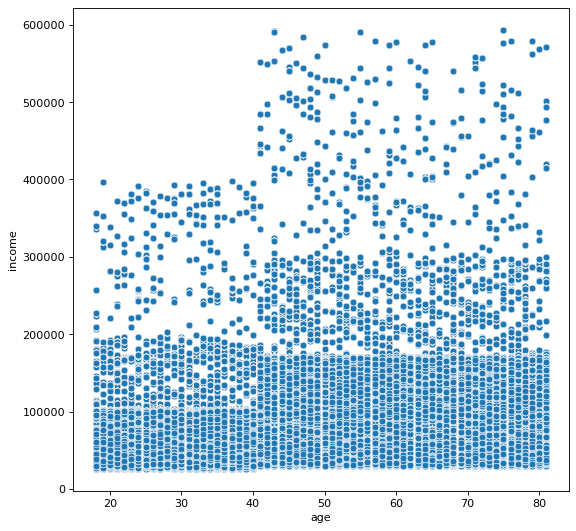

In [56]:
plt.figure(figsize=(8, 8), dpi=80)
scatter = sns.scatterplot(x='age',y='income',data=df_age_income)

#### 1. A majority of customers make up to 200,000 dollars in income. 
#### 2. There is a shift in spending power around the age of 40. It appears that some consumers after the age of 40 breakthrough 400,000 dollars in income and make up to 600,000 dollars.  
#### 3. Instacart consumers above 40 years of age have higher spending power compared to those under 40.

## 8. Exporting visualizations

In [50]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [34]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [35]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours_per_hour.png'))

In [62]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_range_bar.png'))

In [37]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow.png'))

In [38]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_per_hour.png'))

In [39]:
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_familial_status.png'))

In [57]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

In [54]:
Week_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dow.png'))